In [125]:
def f(x):
    if x % 2 == 0:
        #print("even", x)
        return x/2
    else:
        #print("odd", x)
        return (3*x)+1

In [126]:
def tryNumbers(numbers):
    #numbers = list(range(2,n))
    n_steps = []
    for a in numbers:
        temp = a
        steps = 0
        while temp != 1:
            temp = f(temp)
            steps += 1
        n_steps.append(steps)
    return numbers, n_steps

In [127]:
numbers, steps = tryNumbers(list(range(2,1000)))

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt

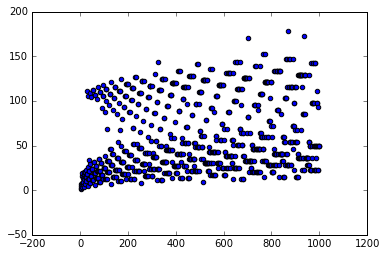

In [129]:
plt.scatter(numbers,steps)

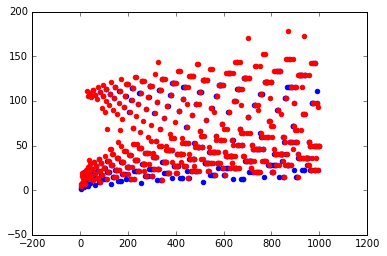

In [130]:
evens, e_steps = numbers[::2], steps[::2]
odds, o_steps = numbers[1::2], steps[1::2]

plt.scatter(evens,e_steps,color='b')
plt.scatter(odds,o_steps,color='r')

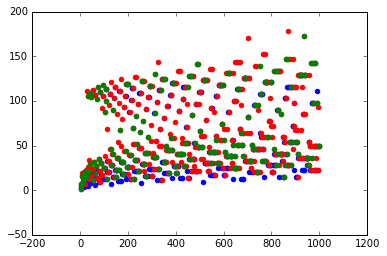

In [131]:
primes = []
with open("data/primes_to_1000.txt",'r') as file:
    primes = file.read().splitlines()


primes = list(map(int, primes))
primes, prime_steps = tryNumbers(primes)

plt.scatter(evens,e_steps,color='b')
plt.scatter(odds,o_steps,color='r')
plt.scatter(primes,prime_steps,color='g')

In [88]:
test = 7
for _ in range(0,20):
    test = f(test)
    if test == 1:
        print("done")
        break
    #print(test)

odd 7
even 22
odd 11.0
even 34.0
odd 17.0
even 52.0
even 26.0
odd 13.0
even 40.0
even 20.0
even 10.0
odd 5.0
even 16.0
even 8.0
even 4.0
even 2.0
done


In [71]:
n = 10000000
count = 0
for number in range(0,n,2):
    if (number/2) % 2 == 0:
        count += 10000000

In [72]:
count/n

0.25

In [ ]:
# for any given even number there is a 3/4 chance it will still be even
# so we expect the the next number will be 3/8

In [132]:
# for every even number, how many times do you have to divide it by 2 to get an odd number
# last digit for even numbers 0,2,4,6,8
# 2/5 times you go from an even to an even (final digit = 4,8)
# 1/5 chance of going from and even then to an even again (final digit = 8)

# last digit for odd numbers 1,3,5,7,9
# 5/5 chance you go from odd to an even

# after n steps we can expect 

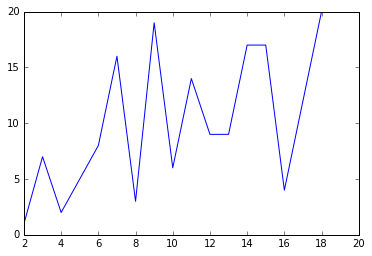

In [139]:
plt.plot(*tryNumbers(range(2,20)))

In [149]:
getSteps(15)

17

In [140]:
def getSteps(x):
    steps = 0
    while x != 1:
        x = f(x)
        steps += 1
    return steps

In [161]:
# are all numbers combinations of 2 and 3?
# partitions of a number with partitions consisting of odd multiples of 3 and even multiples of 2
# 2x + 3y = any number? (x, y >= 0)
def combinationsOf(n):
    solutions = []
    for i in range(0,n+1):      # NOTE: could probably limit this to lower numbers
        for j in range(0,n+1):
            if i == (n-(3*j))/2: #(2x+3y = n)
                solutions.append((i,j))
    return solutions

In [182]:
combinationsOf(12)

[(0, 4), (3, 2), (6, 0)]

In [144]:
# span for integer solutions
def getGCD(a, b):
    return a if (b==0) else getGCD(b,a%b)

In [146]:
getGCD(147,258)

3

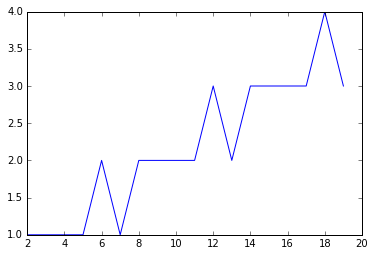

In [183]:
#plt.ylim(4, 0)
plt.plot(list(range(2,20)), [len(combinationsOf(x)) for x in range(2,20)])

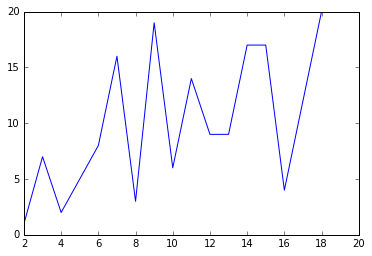

In [184]:
plt.plot(*tryNumbers(range(2,20)))

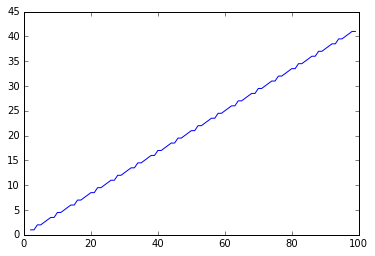

In [189]:
plt.plot(list(range(2,100)), [avgOfCombinations(combinationsOf(x)) for x in range(2,100)])

In [186]:
def avgOfCombinations(combinations):
    sums = 0
    for x,y in combinations:
        sums += x+y
    return sums/len(combinations)

In [192]:
def maxSumofCombinations(combinations):
    return max([x for x,_ in combinations]) + max([y for _,y in combinations])

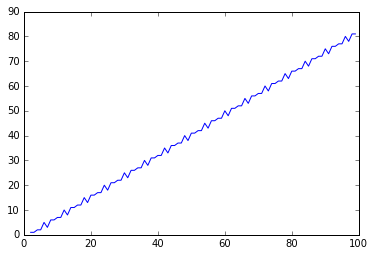

In [193]:
plt.plot(list(range(2,100)), [maxSumofCombinations(combinationsOf(x)) for x in range(2,100)])

In [207]:
def minSumPairofCombinations(combinations):
    return min([x+y for x,y in combinations])

def maxSumPairofCombinations(combinations):
    return max([x+y for x,y in combinations])

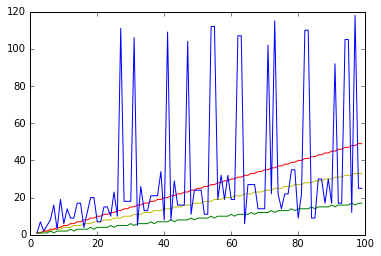

In [255]:
n = 100
plt.plot(list(range(2,n)), [minSumPairofCombinations(combinationsOf(x)) for x in range(2,n)],color='y')
plt.plot(list(range(2,n)), [maxSumPairofCombinations(combinationsOf(x)) for x in range(2,n)],color='r')
plt.plot(list(range(2,n)), [len(combinationsOf(x)) for x in range(2,n)],color='g')
plt.plot(*tryNumbers(range(2,n)), color='b')

In [221]:
# number of steps it takes to get below the original number
def tryNumbers2(numbers):
    #numbers = list(range(2,n))
    n_steps = []
    for a in numbers:
        temp = a
        steps = 0
        while temp >= a:
            temp = f(temp)
            steps += 1
        n_steps.append(steps)
    return numbers, n_steps

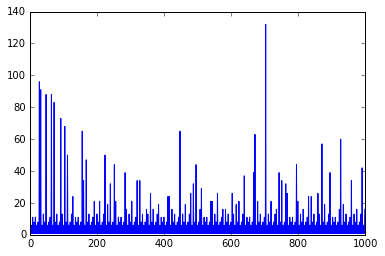

In [256]:
plt.plot(*tryNumbers2(range(2,1000)), color='b')

In [249]:
nums, steps = tryNumbers2(range(2,1000))

for ix, step in enumerate(steps):
    if(step > 20):
        print(ix+2,step)


27 96
31 91
47 88
63 88
71 83
91 73
103 68
111 50
127 24
155 65
159 34
167 47
191 21
207 21
223 50
239 32
251 44
255 21
283 39
303 21
319 34
327 34
359 26
411 24
415 24
447 65
479 26
487 32
495 44
511 29
539 21
543 21
559 26
603 26
623 21
639 37
667 39
671 63
679 21
703 132
719 21
743 39
751 34
763 32
767 26
795 44
799 21
831 24
839 24
859 26
871 57
895 39
927 60
959 34
991 42


In [236]:
combinationsOf(27)

[(0, 9), (3, 7), (6, 5), (9, 3), (12, 1)]

In [237]:
combinationsOf(31)

[(2, 9), (5, 7), (8, 5), (11, 3), (14, 1)]

In [239]:
combinationsOf(26)

[(1, 8), (4, 6), (7, 4), (10, 2), (13, 0)]

In [240]:
21+30+27+12

90

In [242]:
9+10+11+12+13

55

In [250]:
# i give up for now.